# **7장. 월말 편중과 실수요 기반 수요관리**

X 축은 주차 Y축은 주차별 출고량 합계로 막대그래프 그려줘
4, 8, 13, 17주차는 주황색, 나머지 주차는 밝은 파란색, 윤곽선은 검은색  막대이다.
1주차는 2011년 1월2일부터 1월8일이다. 즉, 한해의 첫 번쨰 목요일이 있는 주차부터 시작한다.
주차는 01, 02, 03 처럼 문자형태로 표시하고 저장한다.

# 도표 7-7. 2011년 출고실적 업로드 파이썬 코드

In [ ]:
import pandas as pd

data_path = '/content/sample_data/출고2011.xlsx'
data = pd.read_excel(data_path)

data.head(), data.columns

(               출고번호    모델  출고량                출고시간
 0  S201101050647001  모델01  357 2011-01-05 06:47:16
 1  S201101030349001  모델01  206 2011-01-03 03:49:51
 2  S201101042317001  모델01  206 2011-01-04 23:17:41
 3  S201101072105001  모델01   75 2011-01-07 21:05:24
 4  S201101070455001  모델01  150 2011-01-07 04:55:41,
 Index(['출고번호', '모델', '출고량', '출고시간'], dtype='object'))

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

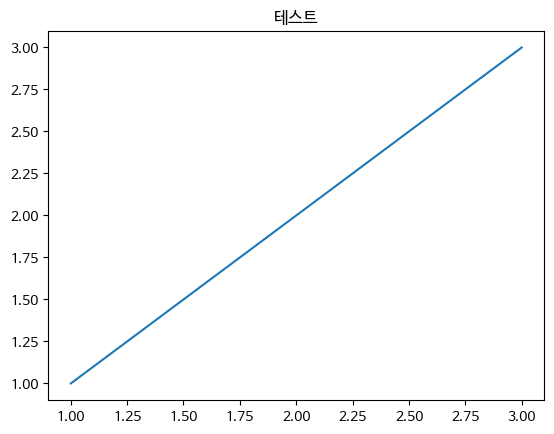

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 예시 경로

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

# Matplotlib의 rcParams에 폰트 지정
plt.rcParams['font.family'] = font_name

# 그래프 그리기 예시
plt.figure()
plt.plot([1, 2, 3], [1, 2, 3])
plt.title('테스트')
plt.show()


In [ ]:
# '출고시간' 열의 데이터를 datetime 타입으로 변환합니다.
# 이는 날짜와 시간을 기반으로 한 다양한 시간 연산을 가능하게 합니다.
data['출고시간'] = pd.to_datetime(data['출고시간'])

# '출고시간'의 날짜 정보를 기준으로 각 날짜가 속한 ISO 주차를 추출합니다.
# dt.isocalendar().week는 해당 날짜가 속한 주의 주차 번호를 반환합니다.
data['주차'] = data['출고시간'].dt.isocalendar().week

# 데이터를 '주차' 별로 그룹화하고, 각 그룹의 '출고량'을 합산하여 주차별 출고량 합계를 계산합니다.
# groupby로 '주차'를 기준으로 그룹화하고, 출고량을 sum 함수로 합산한 결과를 새로운 DataFrame으로 반환합니다.
weekly_sum = data.groupby('주차')['출고량'].sum().reset_index()

# '주차'의 표시 형식을 2자리 숫자로 통일하기 위해 zfill(2)를 사용할 수도 있지만.
# weekly_sum['주차'] = weekly_sum['주차'].astype(str).apply(lambda x: x.zfill(2))
# 각 주차 번호를 문자열로 변환하면서, 한 자리 수의 경우 앞에 '0'을 추가하여 두 자리로 만듭니다.
# f'{x:02d}'는 x를 최소 2자리의 정수(d)로 포맷팅하며, 필요한 경우 앞에 '0'을 추가합니다.
weekly_sum['주차'] = weekly_sum['주차'].apply(lambda x: f'{x:02d}')
weekly_sum.head()


,주차,출고량
0,01,53686
1,02,54646
2,03,63999
3,04,75673
4,05,59048


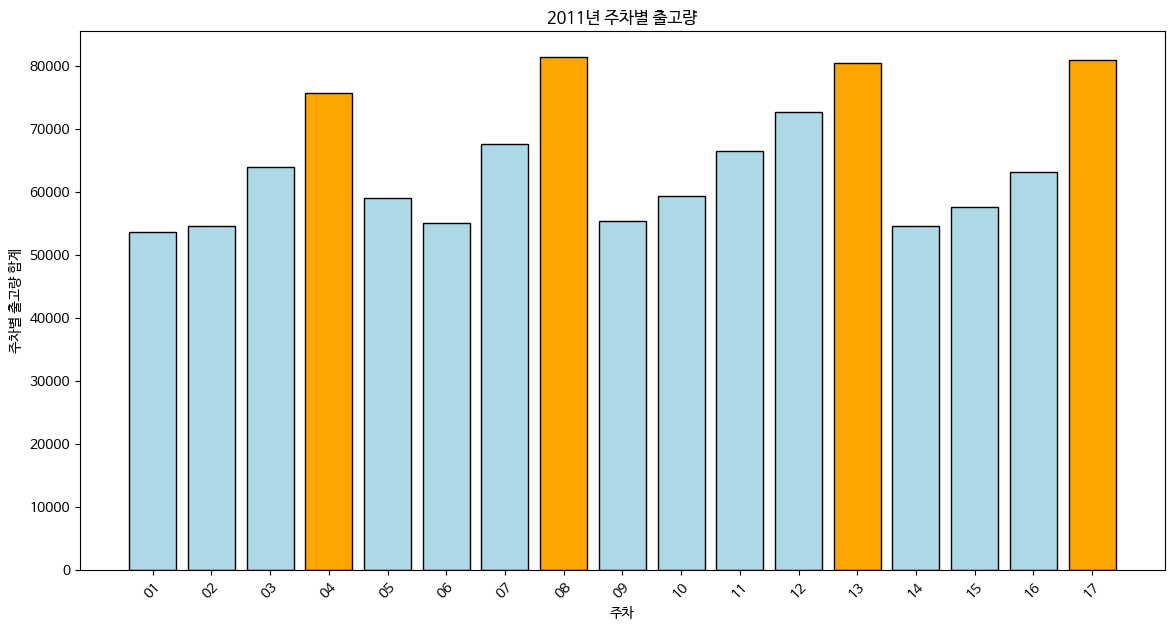

In [ ]:
import matplotlib.pyplot as plt

# 강조할 주차를 리스트로 정의합니다.
# 이 리스트에 포함된 주차는 막대 그래프에서 특정 색상으로 표시됩니다.
highlight_weeks = ['04', '08', '13', '17']

# 주차별로 색상을 설정합니다. highlight_weeks에 포함된 주차는 'orange'로, 그 외는 'lightblue'로 설정합니다.
# 이를 위해 리스트 내포를 사용하여 weekly_sum['주차']의 각 요소에 대해 조건에 따라 색상을 지정합니다.
colors = ['orange' if week in highlight_weeks else 'lightblue' for week in weekly_sum['주차']]

# 막대 그래프의 크기를 설정합니다. 여기서는 가로 14인치, 세로 7인치로 설정하였습니다.
plt.figure(figsize=(14, 7))

# 막대 그래프를 생성합니다. '주차'는 x축, '출고량'은 y축으로 설정하며, 앞서 정의한 색상과 검은색 윤곽선을 사용합니다.
bars = plt.bar(weekly_sum['주차'], weekly_sum['출고량'], color=colors, edgecolor='black')

# x축 라벨을 '주차'로, y축 라벨을 '주차별 출고량 합계'로 설정합니다.
plt.xlabel('주차')
plt.ylabel('주차별 출고량 합계')

# 그래프의 제목을 '2011년 주차별 출고량'으로 설정합니다.
plt.title('2011년 주차별 출고량')

# x축의 주차 라벨이 겹치지 않도록 45도로 회전시킵니다.
plt.xticks(rotation=45)
plt.show()
